In [ ]:
pip install ndlib

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import ndlib.models.epidemics as ep
import json
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [ ]:
g = nx.read_gml("football.gml")
#g = nx.karate_club_graph()
nodes = len(g.nodes)

FileNotFoundError: ignored

In [ ]:
nodes

In [ ]:
centrality = nx.degree_centrality(g)

NameError: ignored

In [ ]:
centrality

In [ ]:
df=pd.DataFrame(centrality.values()).describe()

In [ ]:
df

**Whole graph coverage**

In [ ]:
def whole_graph_coverage():

  for j in range(3,8):
    iterations=[]
    for key,value in centrality.items():
      if value == df[0][j]:
        infected_node = [key]

        model = ep.SIModel(g)
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.1) # infection rate
        cfg.add_model_initial_configuration("Infected", infected_node)
        model.set_initial_status(cfg)

        infected = 0
        i = 0
        while(infected != nodes):
          iteration = model.iteration()
          infected = iteration['node_count'][1]
          i+=1
        
        iterations.append(i)

    required_iterations.append(iterations)
        

In [ ]:
required_iterations=[]
whole_graph_coverage()

NameError: ignored

In [ ]:
required_iterations
import matplotlib.pyplot as plt
plt.title('Whole Graph Coverage')
plt.ylabel('No. of iterations')
plt.boxplot(required_iterations,column=['min', 'min_med', 'median','max_med','max'])
plt.show()

NameError: ignored

In [ ]:
pad=10
for lst in required_iterations:
  while(len(lst)!=pad):
    if(len(lst)>pad): lst.pop()
    else: lst.append(np.mean(lst))

In [ ]:
data=pd.DataFrame({'min' : required_iterations[0], 
                   'min_med' : required_iterations[1],
                   'median' : required_iterations[2],
                   'max_med' : required_iterations[3],
                   'max' : required_iterations[4]})


In [ ]:
data

,min,min_med,median,max_med,max
0,14.0,16,15,20,18
1,14.0,13,17,16,14
2,14.0,16,18,15,14
3,14.0,17,14,19,17
4,14.0,17,14,17,16
5,14.0,14,16,13,16
6,14.0,15,14,19,19
7,14.0,18,14,15,18
8,14.0,18,14,17,19
9,14.0,14,16,13,15


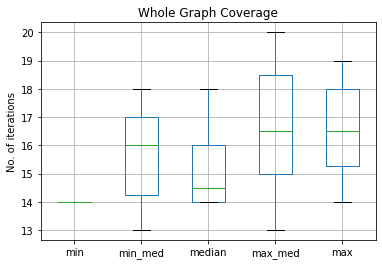

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.title('Whole Graph Coverage')
plt.ylabel('No. of iterations')
data.boxplot(column=['min', 'min_med', 'median','max_med','max'])

In [ ]:
model = ep.SIModel(g)
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.1) # infection rate
cfg.add_model_initial_configuration("Infected", ['NewMexico'])
model.set_initial_status(cfg)

In [ ]:
iteration = model.iteration()
iteration
node_stats=iteration['status']

In [ ]:
infected_nodes=[]
for i in node_stats:
  if node_stats[i]==1:
    infected_nodes.append(i)
infected_nodes

['NewMexico']

In [ ]:
NC=[]
while(len(infected_nodes) != nodes):
  # print(len(infected_nodes))
  iteration = model.iteration()
  node_stats=iteration['status']
  #print(node_stats)
  if(len(node_stats)!=0):
    for key in node_stats.keys():
      infected_nodes.append(key)

  infected = iteration['node_count'][1]
  sum=0
  for node in infected_nodes:
    infected_neighbors=set(infected_nodes)&set(nx.neighbors(g,node))
    sum+=len(infected_neighbors)/len(list(nx.neighbors(g,node)))
  NC.append(sum/iteration['node_count'][1])

print(NC)

[0.0, 0.12171717171717171, 0.1390151515151515, 0.18156565656565657, 0.3070202020202021, 0.3163804713804713, 0.49044444444444435, 0.5881240981240979, 0.7106218434343434, 0.7475294612794612, 0.7870021645021646, 0.8235926336536089, 0.8610970819304149, 0.9249851455733803, 0.9546366442199775, 0.9916090731880205, 0.9916090731880205, 1.0]


In [ ]:
type(iteration['node_count'][1])

int

In [ ]:
len(infected_nodes)

115

In [ ]:
list(nx.neighbors(g,0))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]